The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

What is the most commonly awarded gender and birth country?
Number Male: 905
Number Male: 65
Top Gender : Male
Count Plot : 


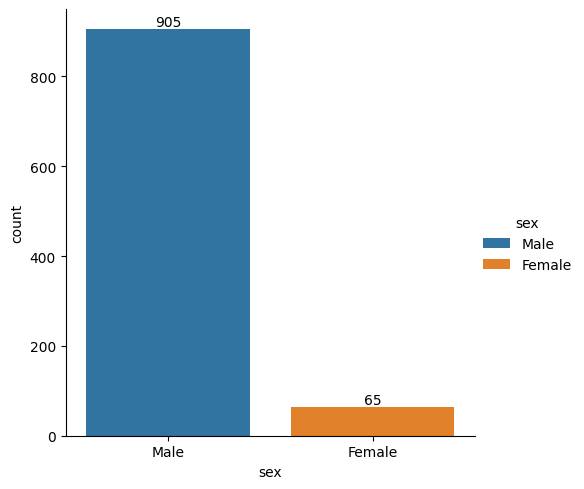

-----------------
Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
the highest ratio of US-born Nobel Prize winners to total winners in all categories : 2000
-----------------
Which decade and Nobel Prize category combination had the highest proportion of female laureates?
{np.int64(2020): 'Literature'}
-----------------
Who was the first woman to receive a Nobel Prize, and in what category?
Marie Curie, née Sklodowska Physics
-----------------
Which individuals or organizations have won more than one Nobel Prize throughout the years?
['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Frederick Sanger', 'John Bardeen', 'Linus Carl Pauling', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


In [2]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"data\nobel.csv")

# What is the most commonly awarded gender and birth country?
# Store your answers as string variables top_gender and top_country.

print("What is the most commonly awarded gender and birth country?")
male = df[df["sex"] == "Male"]
count_male = male["prize"].count()

print(f"Number Male: {count_male}")
female = df[df["sex"] == "Female"]
count_female = female["prize"].count()
print(f"Number Male: {count_female}")

top_gender = ""
if count_male > count_female: 
    top_gender = "Male"
else : 
    top_gender = "female"

print(f"Top Gender : {top_gender}")


print('Count Plot : ')
g = sns.catplot(kind = "count" , x = "sex" , hue="sex" , data = df)
ax = g.ax             
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

top_country = df["birth_country"].value_counts().idxmax()

# -------------------------------------------

# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

# Store this as an integer called max_decade_usa.

print("-----------------")

print("Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?")

df["decade"] = (df["year"] // 10) * 10 

total_decades = df.groupby("decade")["prize"].count()

usa_decades = df[df["birth_country"] == "United States of America"].groupby("decade")["prize"].count()

ratio = usa_decades/ total_decades

max_decade_usa = ratio.idxmax()

print(f"the highest ratio of US-born Nobel Prize winners to total winners in all categories : {max_decade_usa}")
# -------------------------------------

# Which decade and Nobel Prize category combination had the highest proportion of female laureates?

# Store this as a dictionary called max_female_dict where the decade is the key and the category is the value.
# There should only be one key:value pair.

print("-----------------")
print("Which decade and Nobel Prize category combination had the highest proportion of female laureates?")

total_decades = df.groupby(["decade", "category"])["prize"].count()
female_decade = df[df["sex"] == "Female"].groupby(["decade", "category"])["prize"].count()

ratio = female_decade / total_decades

key = ratio.idxmax()
max_female_dict = {key[0]:key[1]}
print(max_female_dict)

# ---------------------------------------

# Who was the first woman to receive a Nobel Prize, and in what category?

# Save your string answers as first_woman_name and first_woman_category.


print("-----------------")
print("Who was the first woman to receive a Nobel Prize, and in what category?")


woman_data = df[df["sex"] == "Female"]
first_year = woman_data["year"].min()
first_woman = woman_data[woman_data["year"] == first_year]
first_woman_name = first_woman["full_name"].iloc[0]
first_woman_category = first_woman["category"].iloc[0]
print(first_woman_name , first_woman_category)
# ---------------------------------------

# Which individuals or organizations have won more than one Nobel Prize throughout the years?

# Store the full names in a list named repeat_list.
print("-----------------")
print("Which individuals or organizations have won more than one Nobel Prize throughout the years?")
one_or_more = df.groupby("full_name")["year"].count()
more_one = one_or_more[one_or_more > 1]
repeat_list = list(more_one.index)
print(repeat_list)
